## Exercise II - Acquire and Prep (Wrangle)

### Exercise Intro

- Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

- As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

- In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.



In [1]:
import pandas as pd
import env as e
import os


def get_zillow():
    # name of cached csv
    filename = "zillow.csv"
    # if cached data exist
    if os.path.isfile(filename):
        # read the file
        df = pd.read_csv(filename)
    # else, pull from sql db if not cached
    else:
        df = pd.read_sql(
            """SELECT yearbuilt,
                       bedroomcnt,
                       bathroomcnt,
                       calculatedfinishedsquarefeet,
                       taxvaluedollarcnt,
                       taxamount,
                       fips
                FROM properties_2017
                WHERE propertylandusetypeid = 261""",
            f"mysql+pymysql://{e.user}:{e.password}@{e.host}/zillow",)
        # cache the pulled data locally
        df.to_csv(filename, index=False)
    return df

In [2]:
# aquire data
df = get_zillow()

In [3]:
# check out data
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   yearbuilt                     2143526 non-null  float64
 1   bedroomcnt                    2152852 non-null  float64
 2   bathroomcnt                   2152852 non-null  float64
 3   calculatedfinishedsquarefeet  2144379 non-null  float64
 4   taxvaluedollarcnt             2152370 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.



In [4]:
# check the percent of all null values in all columns
df.isnull().mean().sum()

0.010580329542567268

> One percent of the data frame has nulls, we should be able to drop them

In [5]:
# drop all rows with null values
df = df.dropna()

In [6]:
# rename columns for readability

df = df.rename(columns=({"yearbuilt": "year", "bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms",
            "calculatedfinishedsquarefeet": "square_feet",
            "taxvaluedollarcnt": "property_value",
            "taxamount": "property_tax",
            "fips": "county",
        }
    )
)

In [7]:
# check if nulls are gone
df.isnull().sum()

year              0
bedrooms          0
bathrooms         0
square_feet       0
property_value    0
property_tax      0
county            0
dtype: int64

In [8]:
# check column types
df.dtypes

year              float64
bedrooms          float64
bathrooms         float64
square_feet       float64
property_value    float64
property_tax      float64
county            float64
dtype: object

In [9]:
# check out dataframe
df

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
4,2005.0,4.0,2.0,3633.0,296425.0,6941.39,6037.0
6,2011.0,3.0,4.0,1620.0,847770.0,10244.94,6037.0
7,1926.0,3.0,2.0,2077.0,646760.0,7924.68,6037.0
11,1972.0,0.0,0.0,1200.0,5328.0,91.60,6037.0
14,1973.0,0.0,0.0,171.0,6920.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,2015.0,4.0,4.0,4375.0,422400.0,13877.56,6037.0
2152858,2015.0,4.0,3.0,2262.0,960756.0,13494.52,6059.0
2152859,2014.0,4.0,4.5,3127.0,536061.0,6244.16,6059.0
2152861,2015.0,3.0,2.5,1974.0,424353.0,5302.70,6059.0


In [10]:
# fips are county codes
# 6037 = Los Angeles County
# 6059 = Orange County
# 6111 = Ventura County

# Rename 'fips' to 'county name'
df.county = df.county.map({6037: "LA", 6059: "Orange", 6111: "Ventura"})

In [11]:
# Convert columns to int data type

df = df.astype({"year": int, "bedrooms": int, "square_feet": int, "property_value": int})
df

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
4,2005,4,2.0,3633,296425,6941.39,LA
6,2011,3,4.0,1620,847770,10244.94,LA
7,1926,3,2.0,2077,646760,7924.68,LA
11,1972,0,0.0,1200,5328,91.60,LA
14,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2152856,2015,4,4.0,4375,422400,13877.56,LA
2152858,2015,4,3.0,2262,960756,13494.52,Orange
2152859,2014,4,4.5,3127,536061,6244.16,Orange
2152861,2015,3,2.5,1974,424353,5302.70,Orange


In [12]:
# check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   year            int64  
 1   bedrooms        int64  
 2   bathrooms       float64
 3   square_feet     int64  
 4   property_value  int64  
 5   property_tax    float64
 6   county          object 
dtypes: float64(2), int64(4), object(1)
memory usage: 130.6+ MB


In [13]:
# number of counties
df.county.value_counts()

county
LA         1425207
Orange      552057
Ventura     162971
Name: count, dtype: int64

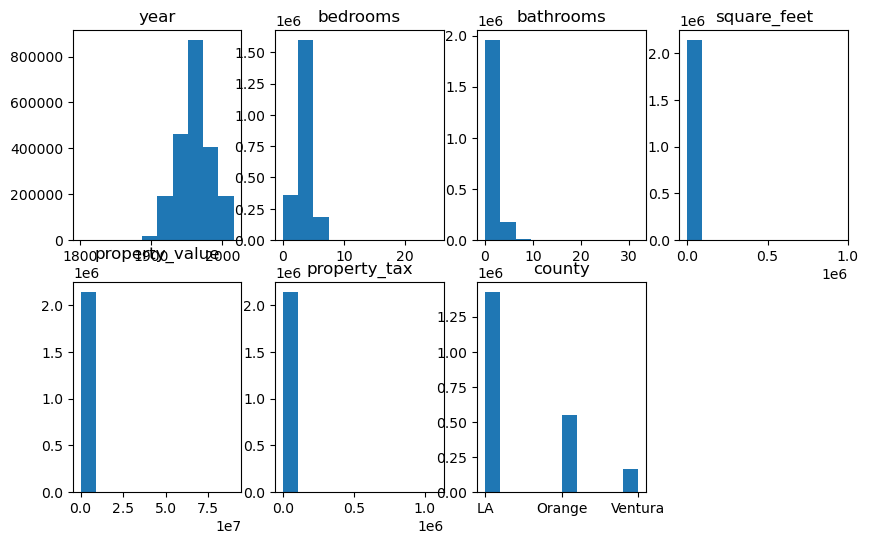

In [14]:
# plot histogram or box plot to show distribution of values
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 6))

for i, col in enumerate(df.columns):
    plot_number = i +1
    plt.subplot(2,4, plot_number)
    plt.title(col)
    plt.hist(df[col])
plt.show()

### 3. Write a function to split your data into train, validate, and test.


In [10]:
# you dont stratify on the target variable when it's continuous
from sklearn.model_selection import train_test_split

def split_data(df):
    """
    This function takes in any DataFrame and a target variable as an argument 
    and returns train, validate, and test dataframes.
    It returns three DataFrames with a printout of their proportion to the original DataFrame.
    """
    train, validate_test = train_test_split(df, train_size=0.6, random_state=123)
    validate, test = train_test_split(validate_test, test_size=0.5, random_state=123)
    print(f"train: {len(train)} ({round(len(train)/len(df), 2)*100}% of {len(df)})")
    print(
        f"validate: {len(validate)} ({round(len(validate)/len(df), 2)*100}% of {len(df)})"
    )
    print(f"test: {len(test)} ({round(len(test)/len(df), 2)*100}% of {len(df)})")

    return train, validate, test


In [16]:
# use function
train, validate, test = split_data(df)


train: 1284141 (60.0% of 2140235)
validate: 428047 (20.0% of 2140235)
test: 428047 (20.0% of 2140235)


### 4. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow


In [3]:
import os
import pandas as pd
import env as e


def wrangle_zillow():
    """
    This function reads the Zillow data from a cached CSV file if it exists,
    or from a SQL database if it doesn't exist. It then renames the columns
    to more descriptive names.

    Args:
    - None

    Returns:
    - pandas dataframe
    """
    # Name of cached CSV file
    filename = "zillow.csv"
    # If cached data exists, read from CSV file
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    # Otherwise, read from SQL database
    else:
        df = pd.read_sql(
            """SELECT yearbuilt,
                                   bedroomcnt,
                                   bathroomcnt,
                                   calculatedfinishedsquarefeet,
                                   taxvaluedollarcnt,
                                   taxamount,
                                   fips
                            FROM properties_2017
                            WHERE propertylandusetypeid = 261""",  # 261 is single family residential id
            f"mysql+pymysql://{e.user}:{e.password}@{e.host}/zillow",
        )
        # Cache data locally
        df.to_csv(filename, index=False)
    # Rename columns
    df = df.rename(
        columns={
            "yearbuilt": "year",
            "bedroomcnt": "bedrooms",
            "bathroomcnt": "bathrooms",
            "calculatedfinishedsquarefeet": "square_feet",
            "taxvaluedollarcnt": "property_value",
            "taxamount": "property_tax",
            "fips": "county",
        }
    )

    # Drop rows with missing values in specific columns 
    df = df.dropna()

    # Map county codes to county names
    df.county = df.county.map({6037: "LA", 6059: "Orange", 6111: "Ventura"})

    # Convert columns to int data type
    df = df.astype({"year": int, "bedrooms": int, "square_feet": int, "property_value": int})

    return df

> ## Next time do not use one huge function that does more than one thing. You can have your acquire and prep as two different functions and wrangle combines the two as wrangle: prep(acquire( ))

In [4]:
# use function
df = wrangle_zillow()
df

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
4,2005,4,2.0,3633,296425,6941.39,LA
6,2011,3,4.0,1620,847770,10244.94,LA
7,1926,3,2.0,2077,646760,7924.68,LA
11,1972,0,0.0,1200,5328,91.60,LA
14,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2152856,2015,4,4.0,4375,422400,13877.56,LA
2152858,2015,4,3.0,2262,960756,13494.52,Orange
2152859,2014,4,4.5,3127,536061,6244.16,Orange
2152861,2015,3,2.5,1974,424353,5302.70,Orange


In [5]:
# make sure nulls are gone
df.isnull().sum()

year              0
bedrooms          0
bathrooms         0
square_feet       0
property_value    0
property_tax      0
county            0
dtype: int64

In [6]:
# check descriptive statistics
df.describe()

,year,bedrooms,bathrooms,square_feet,property_value,property_tax
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,1.960968e+03,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,5.616711e+03
std,2.215056e+01,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,7.814563e+03
min,1.801000e+03,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,6.340000e+00
25%,1.949000e+03,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,2.540850e+03
50%,1.958000e+03,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,4.111470e+03
75%,1.976000e+03,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,6.411930e+03
max,2.016000e+03,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,1.078102e+06


In [7]:
# transpose for readability
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
bedrooms,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathrooms,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
square_feet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
property_value,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
property_tax,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87


In [11]:
# use split function
train, validate, test = split_data(df)


train: 1284141 (60.0% of 2140235)
validate: 428047 (20.0% of 2140235)
test: 428047 (20.0% of 2140235)


In [12]:
#check out train
train

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
462820,2005,5,4.0,3011,710674,7561.14,Ventura
3880,1961,3,2.0,1682,603333,7086.19,LA
992263,1954,4,2.0,1433,82804,1134.83,LA
311722,1999,3,2.5,2001,355444,4174.92,Ventura
787985,1962,4,2.0,2277,571000,7113.02,LA
...,...,...,...,...,...,...,...
1966409,1963,3,2.0,1452,312978,4009.01,LA
1248263,1979,4,3.0,2674,417545,4248.88,Orange
28211,1965,5,3.0,1903,300584,3924.33,LA
279547,2001,4,4.5,3672,1115000,13029.86,Orange
